# Imputación

In [39]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
data = pd.read_csv('athlete_events.csv')

In [2]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Imputación

In [43]:
#La siguiente función me permite elegir qué valor es el que es valor nulo
#por ej un NaN o un unknown, un no, un - etc
#luego se le pasa la estrategia, en este caso se eligira poner la media en los valores que hacen falta.

imput = SimpleImputer(missing_values=np.nan, strategy="mean")

In [45]:
#al método fit transform se le pasa la columna que se quiera imputar
data['Height_Impt'] = imput.fit_transform(data[['Height']])

In [5]:
# método interpolate para rellenar los valores nulos con la tendencia de los datos
data['Height'].interpolate(method="linear")

0         180.0
1         170.0
2         175.0
3         180.0
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 271116, dtype: float64

# Regresión lineal simple

# $\epsilon = \frac{1}{2}\sum(y_i - \hat{y_i})^2$

# $\epsilon = \frac{1}{2}\sum(y_i - b\hat{x_i} - a)^2$



Derivando e igualando a 0

# $\frac{d \epsilon}{db} = \sum(y_i - b\hat{x_i} - a)(-\hat{x_i}) = 0$

# $\frac{d \epsilon}{da} = \sum(y_i - b\hat{x_i} - a) = 0$

# $\sum(-y_i\hat{x_i} + b\hat{x_i}^2 + a\hat{x_i}) = 0$

# $ \sum y_i - b\sum\hat{x_i} - na = 0$

# $ -\sum y_i\hat{x_i} + b\sum\hat{x_i}^2 + a\sum\hat{x_i} = 0$

# $ \sum y_i - b\sum\hat{x_i}  = na$

# $\bar{y} - b \bar{x} = a$

# $ -\sum y_i\hat{x_i} + b\sum\hat{x_i}^2 + (\bar{y} - b \bar{x} )\sum\hat{x_i} = 0$




# $ \sum (y_i\hat{x_i} - \bar{y}\hat{x_i}) + b\sum (\hat{x_i}^2-\hat{x_i}\bar{x})= 0$

# $b = \frac{ \sum (y_i\hat{x_i} - \bar{y}\hat{x_i})}{\sum (\hat{x_i}^2-\hat{x_i}\bar{x})}$

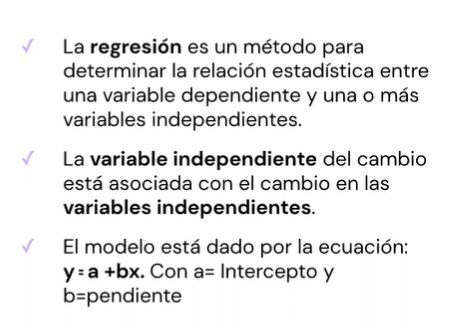


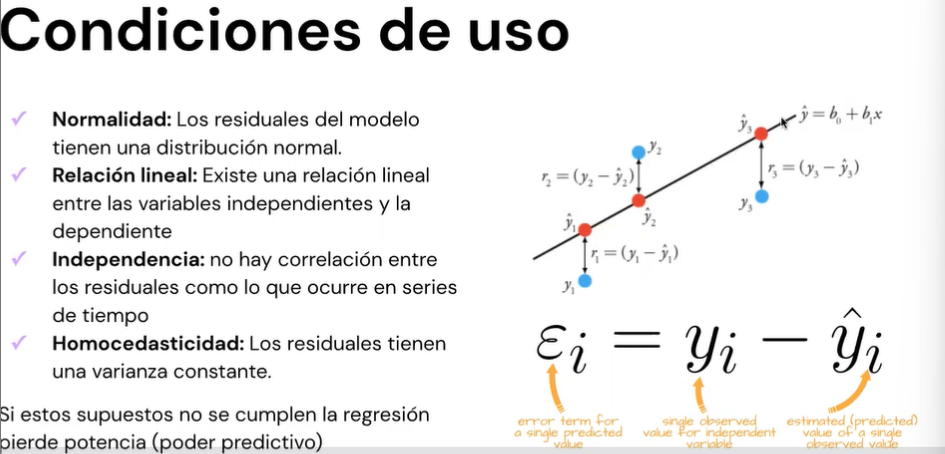


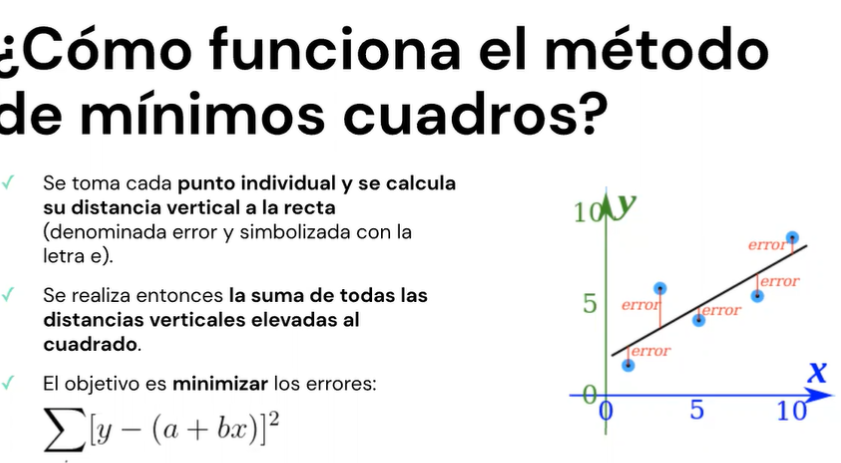


In [55]:
import pingouin


ImportError: cannot import name 'studentized_range' from 'scipy.stats' (C:\Users\USA\anaconda3\lib\site-packages\scipy\stats\__init__.py)

In [56]:
x = np.linspace(-10,10,100)

In [57]:
y = x + np.random.normal(0,1,100)

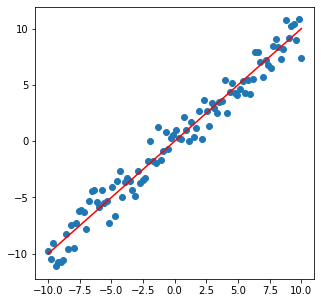

In [58]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(x,y)
ax.plot((-10,10),(-10,10), color='red')

In [61]:
pingouin.linear_regression(x, y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.196577,0.100748,-1.951184,5.389064e-02,0.970822,0.970524,-0.396508,0.003353
1,x1,0.986517,0.017276,57.102028,5.006997e-77,0.970822,0.970524,0.952233,1.020802


In [62]:
np.corrcoef(x,y)**2

array([[1.        , 0.97082154],
       [0.97082154, 1.        ]])